In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Excel file
file_path = r"D:\Sem 3\PRJ-1\KPMG_VI_New_raw_data_update_final.xlsx"
worksheet_name = 'CustomerDemographic'
dtype_mapping = {'DateOfBirth': str}
custdemo_df = pd.read_excel(file_path, sheet_name=worksheet_name, dtype=dtype_mapping)
custdemo_df

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3995,2858,Benedicto Radki,Male,4,2002-01-09 00:00:00,Recruiting Manager,NaN,Mass Customer,N,Yes,1.0
3996,3173,Angelo,Male,55,2001-10-10 00:00:00,Computer Systems Analyst I,Health,Mass Customer,N,Yes,1.0
3997,3435,Stevena Allcock,Female,80,2002-01-15 00:00:00,Senior Editor,NaN,Affluent Customer,N,No,1.0
3998,3949,Costa Sleightholm,Male,24,2001-12-19 00:00:00,Web Designer IV,Manufacturing,High Net Worth,N,Yes,1.0


<hr>

# Data OverView

In [3]:
custdemo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   job_title                            3494 non-null   object 
 6   job_industry_category                3344 non-null   object 
 7   wealth_segment                       4000 non-null   object 
 8   deceased_indicator                   4000 non-null   object 
 9   owns_car                             4000 non-null   object 
 10  tenure                               3913 non-null   float64
dtypes: float64(1), int64(2), objec

In [4]:
print("Total rows in the dataset : {}".format(custdemo_df.shape[0]))
print("Total columns in the dataset : {}".format(custdemo_df.shape[1]))

Total rows in the dataset : 4000
Total columns in the dataset : 11


In [5]:
# select non-numeric columns
df_non_numeric = custdemo_df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))
print()

# select numeric columns
df_numeric = custdemo_df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))

The non-numeric columns are : ['name' 'gender' 'DOB' 'job_title' 'job_industry_category'
 'wealth_segment' 'deceased_indicator' 'owns_car']

The numeric columns are : ['customer_id' 'past_3_years_bike_related_purchases' 'tenure']


<hr>

# Checking for the presence of any missing values

If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [6]:
# Total number of missing values
custdemo_df.isnull().sum()

customer_id                              0
name                                     0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

Here it is observed that columns like DOB, job_title, job_industry_category and tenure have missing values.

<hr>

# Working with Missing values

### Date of Birth Column

In [7]:
custdemo_df[custdemo_df['DOB'].isnull()]

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,144,Jory Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
5,451,Marlow Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...
83,3779,Ulick Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
84,3883,Nissa Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
85,3931,Kylie Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN
86,3935,Teodor Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,Yes,NaN


In [8]:
round(custdemo_df['DOB'].isnull().mean()*100)

2

Since less than 5 % of data has null date of birth. we can remove the records where date of birth is null.

In [9]:
dob_index_drop = custdemo_df[custdemo_df['DOB'].isnull()].index
dob_index_drop

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87],
      dtype='int64')

In [10]:
custdemo_df.drop(index=dob_index_drop, inplace=True, axis=0)
custdemo_df['DOB'].isnull().sum()

0

Currently there are no missing values for DOB column.

#### EXtracting Age from Date of Birth

In [11]:
custdemo_df['DOB'] = pd.to_datetime(custdemo_df['DOB'])
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

custdemo_df['Age'] = custdemo_df['DOB'].apply(age)

In [12]:
custdemo_df['Age'].describe()

count    3913.000000
mean       45.923588
std        12.793029
min        21.000000
25%        36.000000
50%        46.000000
75%        55.000000
max       179.000000
Name: Age, dtype: float64

Here we find there is only 1 customer with an age of 179. Clearly this is an outlier since the 75th percentile of Age is 55.

In [13]:
custdemo_df[custdemo_df['Age'] > 100]

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,34,Jephthah Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,179


Here we see a customer with age 179 which is an outlier. hence we need to remove this record.

In [14]:
age_index_drop = custdemo_df[custdemo_df['Age']>100].index
custdemo_df.drop(index=age_index_drop, inplace=True , axis=0)

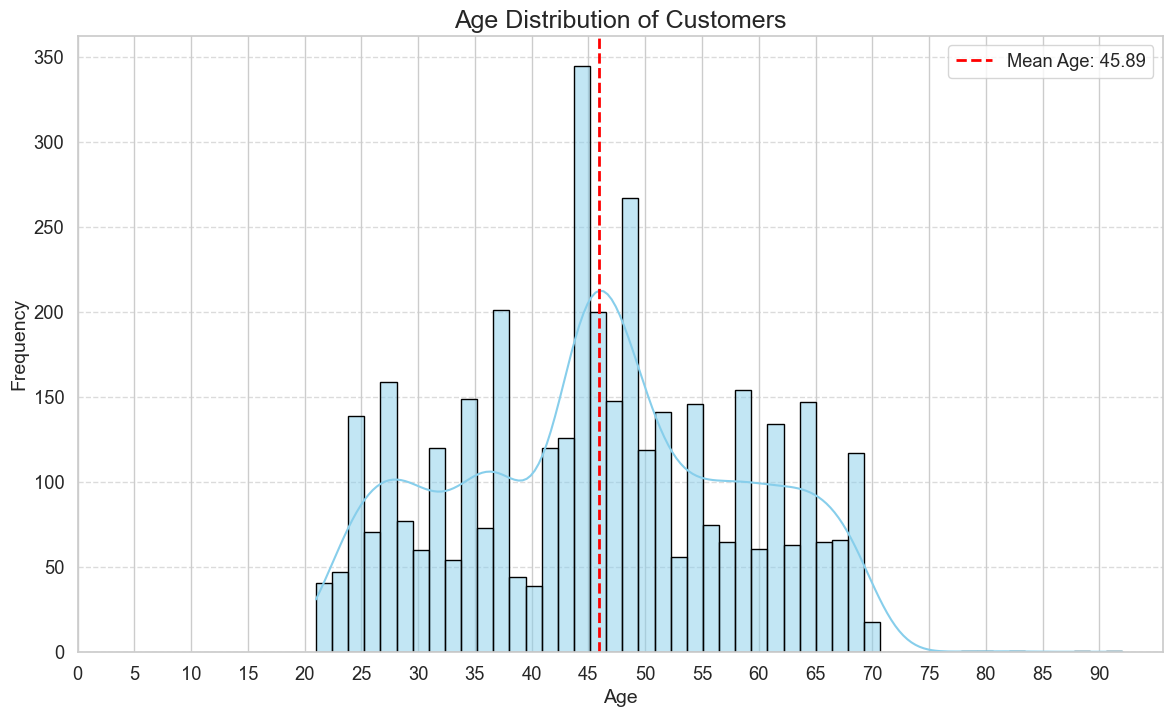

In [31]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid", font_scale=1.2)

# Create a figure and axis with appropriate size
plt.figure(figsize=(14, 8))

# Plot a kernel density estimate along with a histogram
sns.histplot(custdemo_df['Age'], kde=True, bins=50, color='skyblue', edgecolor='black')

# Customize the title and labels
plt.title('Age Distribution of Customers', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a vertical line for the mean age
mean_age = custdemo_df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
plt.legend()

# Customize the grid and ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, max(custdemo_df['Age'])+1, 5))

# Show the plot
plt.show()

### Tenure Column

In [16]:
custdemo_df['tenure'].isnull().sum()

0

There are no missing values for Tenure column.
After removing null DOBs from dataframe , null tenures were also removed.

### Job Title Column

In [17]:
# Fetching records where Job Title is missing.
custdemo_df[custdemo_df['job_title'].isnull()]

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
90,3410,Merrili Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,No,16.0,83
95,11,Uriah Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0,69
116,2208,Lavena Embling,Female,59,1954-05-07,NaN,NaN,Mass Customer,N,No,9.0,69
137,3806,Ado Gailor,Male,1,1954-02-08,NaN,Property,Mass Customer,N,No,7.0,69
155,691,Carver Carwardine,Male,29,1954-08-25,NaN,Financial Services,Affluent Customer,N,Yes,5.0,69
...,...,...,...,...,...,...,...,...,...,...,...,...
3965,2869,Gavra Woolvin,Female,19,2001-01-16,NaN,Manufacturing,Affluent Customer,N,No,2.0,22
3974,3459,Emelda Ramsdell,Female,62,2000-11-24,NaN,Entertainment,Mass Customer,N,Yes,2.0,23
3977,3749,Blondelle Swynley,Female,3,2001-04-21,NaN,IT,Affluent Customer,N,No,1.0,22
3982,422,Vito Norker,Male,78,2002-01-06,NaN,Manufacturing,Affluent Customer,N,No,1.0,21


In [18]:
round(custdemo_df['job_title'].isnull().mean()*100)

13

Since Percentage of missing Job is 13. We will replace null values with Missing.

In [19]:
custdemo_df['job_title'].fillna('Missing', inplace=True, axis=0)
custdemo_df['job_title'].isnull().sum()

0

Currently there are no missing values for job_title column.

### Job Industry Category Column

In [20]:
custdemo_df[custdemo_df['job_industry_category'].isnull()]

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
97,187,Pincas Ather,Male,97,1954-01-28,Structural Engineer,NaN,Mass Customer,N,No,11.0,69
116,2208,Lavena Embling,Female,59,1954-05-07,Missing,NaN,Mass Customer,N,No,9.0,69
117,2283,Gaspar Janaway,Male,44,1954-02-08,Software Consultant,NaN,High Net Worth,N,No,16.0,69
127,3100,Peggy Wrankling,Female,19,1954-02-09,Recruiter,NaN,Mass Customer,N,No,7.0,69
129,3259,Rabi,Male,74,1953-11-04,Quality Control Specialist,NaN,High Net Worth,N,No,10.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...
3960,2588,Kimball Martinho,Male,37,2001-01-02,Professor,NaN,High Net Worth,N,No,2.0,22
3964,2812,Molli Hagergham,Female,16,2001-04-01,Budget/Accounting Analyst IV,NaN,High Net Worth,N,Yes,1.0,22
3968,3014,Terrijo Merlin,Female,59,2001-03-30,Software Engineer II,NaN,High Net Worth,N,No,1.0,22
3995,2858,Benedicto Radki,Male,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,Yes,1.0,21


In [21]:
round(custdemo_df['job_industry_category'].isnull().mean()*100)

17

Since Percentage of missing Job is 17. We will replace null values with Missing.

In [22]:
custdemo_df['job_industry_category'].fillna('Missing', inplace=True, axis=0)
custdemo_df['job_industry_category'].isnull().sum()

0

Finally there are no Missing Values in the dataset.

In [23]:
custdemo_df.isnull().sum()

customer_id                            0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [24]:
print("Total records after removing Missing Values: {}".format(custdemo_df.shape[0]))

Total records after removing Missing Values: 3912


<hr>

## Inconsistency Check into Dataset

We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'

### Gender Column

In [25]:
custdemo_df['gender'].value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

### Wealth Segment Column

In [26]:
custdemo_df['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

### Deceased Indicator Column

In [27]:
custdemo_df['deceased_indicator'].value_counts()

deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

### Owns a Car Column

In [28]:
custdemo_df['owns_car'].value_counts()

owns_car
Yes    1974
No     1938
Name: count, dtype: int64

<hr>

### Duplication Checks

To ensure the dataset's integrity and prevent data analysis errors resulting from poor data quality, it is crucial to eliminate duplicate records. If the dataset contains duplicate rows, they should be removed.

To identify and eliminate duplicate records, we follow these steps:

1. **Preparation:** Initially, exclude the primary key column from consideration since it's expected to be unique.

2. **Duplicate Detection:** Employ the `drop_duplicates()` function available in Python to identify and remove duplicate rows. This function identifies rows with identical data across all columns and eliminates the duplicate entries.

In [29]:
cust_demo_dedupped = custdemo_df.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id, duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(custdemo_df.shape[0]))

Number of records after removing customer_id, duplicates : 3912
Number of records in original dataset : 3912


In [30]:
custdemo_df.to_csv("D:\Sem 3\PRJ-1\CustomerDemographic_Cleaned.csv", index=False)